In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://github.com/idandrd/israel-covid19-data/raw/master/IsraelCOVID19.csv'
df = pd.read_csv(url, index_col=0)


In [4]:
df

,Total Cases,New Cases,בינוני Moderate,קשה Severe,נפטרו Deceased,Total Recovered,New Recovered,נבדקים היום Tested Today,"סה""כ נבדקים Total Tested",אחוז חיוביים Percent Positive,GF Normalized to Tests,Baseline
Date,,,,,,,,,,,,
21/02/2020,2,2.0,NaN,NaN,NaN,NaN,NaN,15.0,472.0,NaN,NaN,NaN
22/02/2020,7,5.0,NaN,NaN,NaN,NaN,NaN,13.0,485.0,NaN,NaN,NaN
23/02/2020,12,5.0,NaN,NaN,NaN,NaN,NaN,75.0,560.0,NaN,NaN,NaN
24/02/2020,18,6.0,NaN,NaN,NaN,NaN,NaN,58.0,618.0,NaN,NaN,NaN
25/02/2020,20,2.0,NaN,NaN,NaN,NaN,NaN,104.0,722.0,1.92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21/04/2020,14416,296.0,135.0,142.0,181.0,4624.0,402.0,11422.0,266845.0,2.59,1.131004,1.0
22/04/2020,14645,229.0,124.0,148.0,187.0,5057.0,433.0,11902.0,278747.0,1.92,0.741313,1.0
23/04/2020,14924,279.0,112.0,136.0,191.0,5482.0,425.0,13861.0,292608.0,2.01,1.046875,1.0


In [5]:
df['actual'] = df['Total Cases'] - df['Total Recovered']

In [6]:
df['actual_no_death'] = df['actual'] - df['נפטרו Deceased']

In [7]:
df[40:]

,Total Cases,New Cases,בינוני Moderate,קשה Severe,נפטרו Deceased,Total Recovered,New Recovered,נבדקים היום Tested Today,"סה""כ נבדקים Total Tested",אחוז חיוביים Percent Positive,GF Normalized to Tests,Baseline,actual,actual_no_death
Date,,,,,,,,,,,,,,
01/04/2020,6371,695.0,129.0,95.0,21.0,330.0,37.0,8213.0,82667.0,8.46,0.930693,1.0,6041.0,6020.0
02/04/2020,7088,717.0,126.0,108.0,29.0,431.0,101.0,9082.0,91749.0,7.89,0.932624,1.0,6657.0,6628.0
03/04/2020,7677,589.0,144.0,113.0,36.0,508.0,77.0,9903.0,101652.0,5.95,0.754119,1.0,7169.0,7133.0
04/04/2020,8103,426.0,165.0,126.0,42.0,571.0,63.0,6647.0,108299.0,6.41,1.077311,1.0,7532.0,7490.0
05/04/2020,8671,568.0,182.0,139.0,46.0,676.0,105.0,9279.0,117578.0,6.12,0.954758,1.0,7995.0,7949.0
06/04/2020,9098,427.0,197.0,140.0,51.0,773.0,97.0,7250.0,124828.0,5.89,0.962418,1.0,8325.0,8274.0
07/04/2020,9462,364.0,189.0,149.0,59.0,854.0,81.0,6592.0,131420.0,5.52,0.937182,1.0,8608.0,8549.0
08/04/2020,9797,335.0,199.0,147.0,71.0,905.0,51.0,5573.0,136993.0,6.01,1.088768,1.0,8892.0,8821.0
09/04/2020,10145,348.0,171.0,166.0,79.0,976.0,71.0,5532.0,142525.0,6.29,1.046589,1.0,9169.0,9090.0


## number of active cases(blue) vs total cases(red)

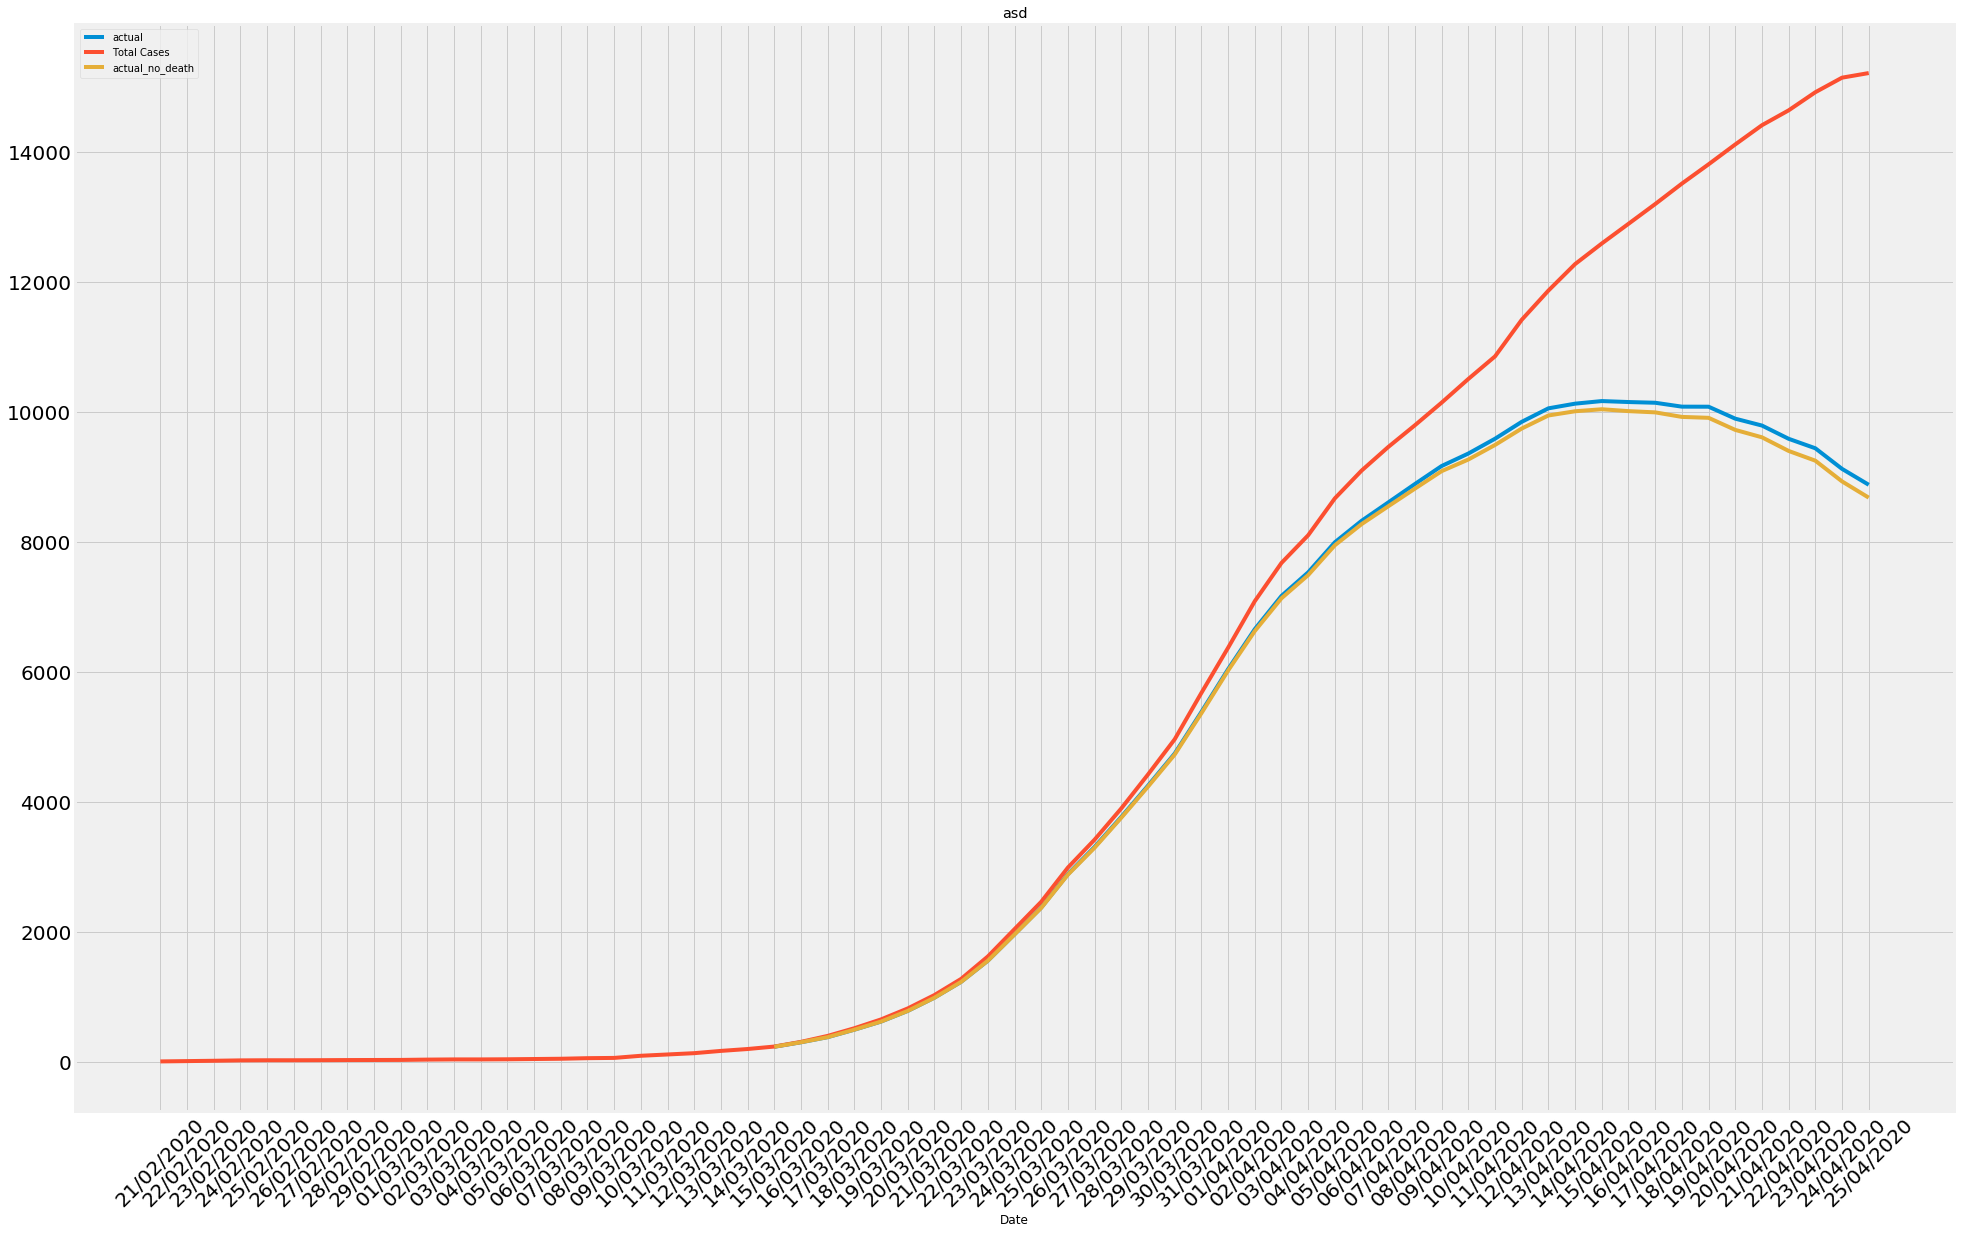

In [8]:
df[['actual','Total Cases','actual_no_death']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## number of moderate(blue), severe(red) and dead(yellow) cases

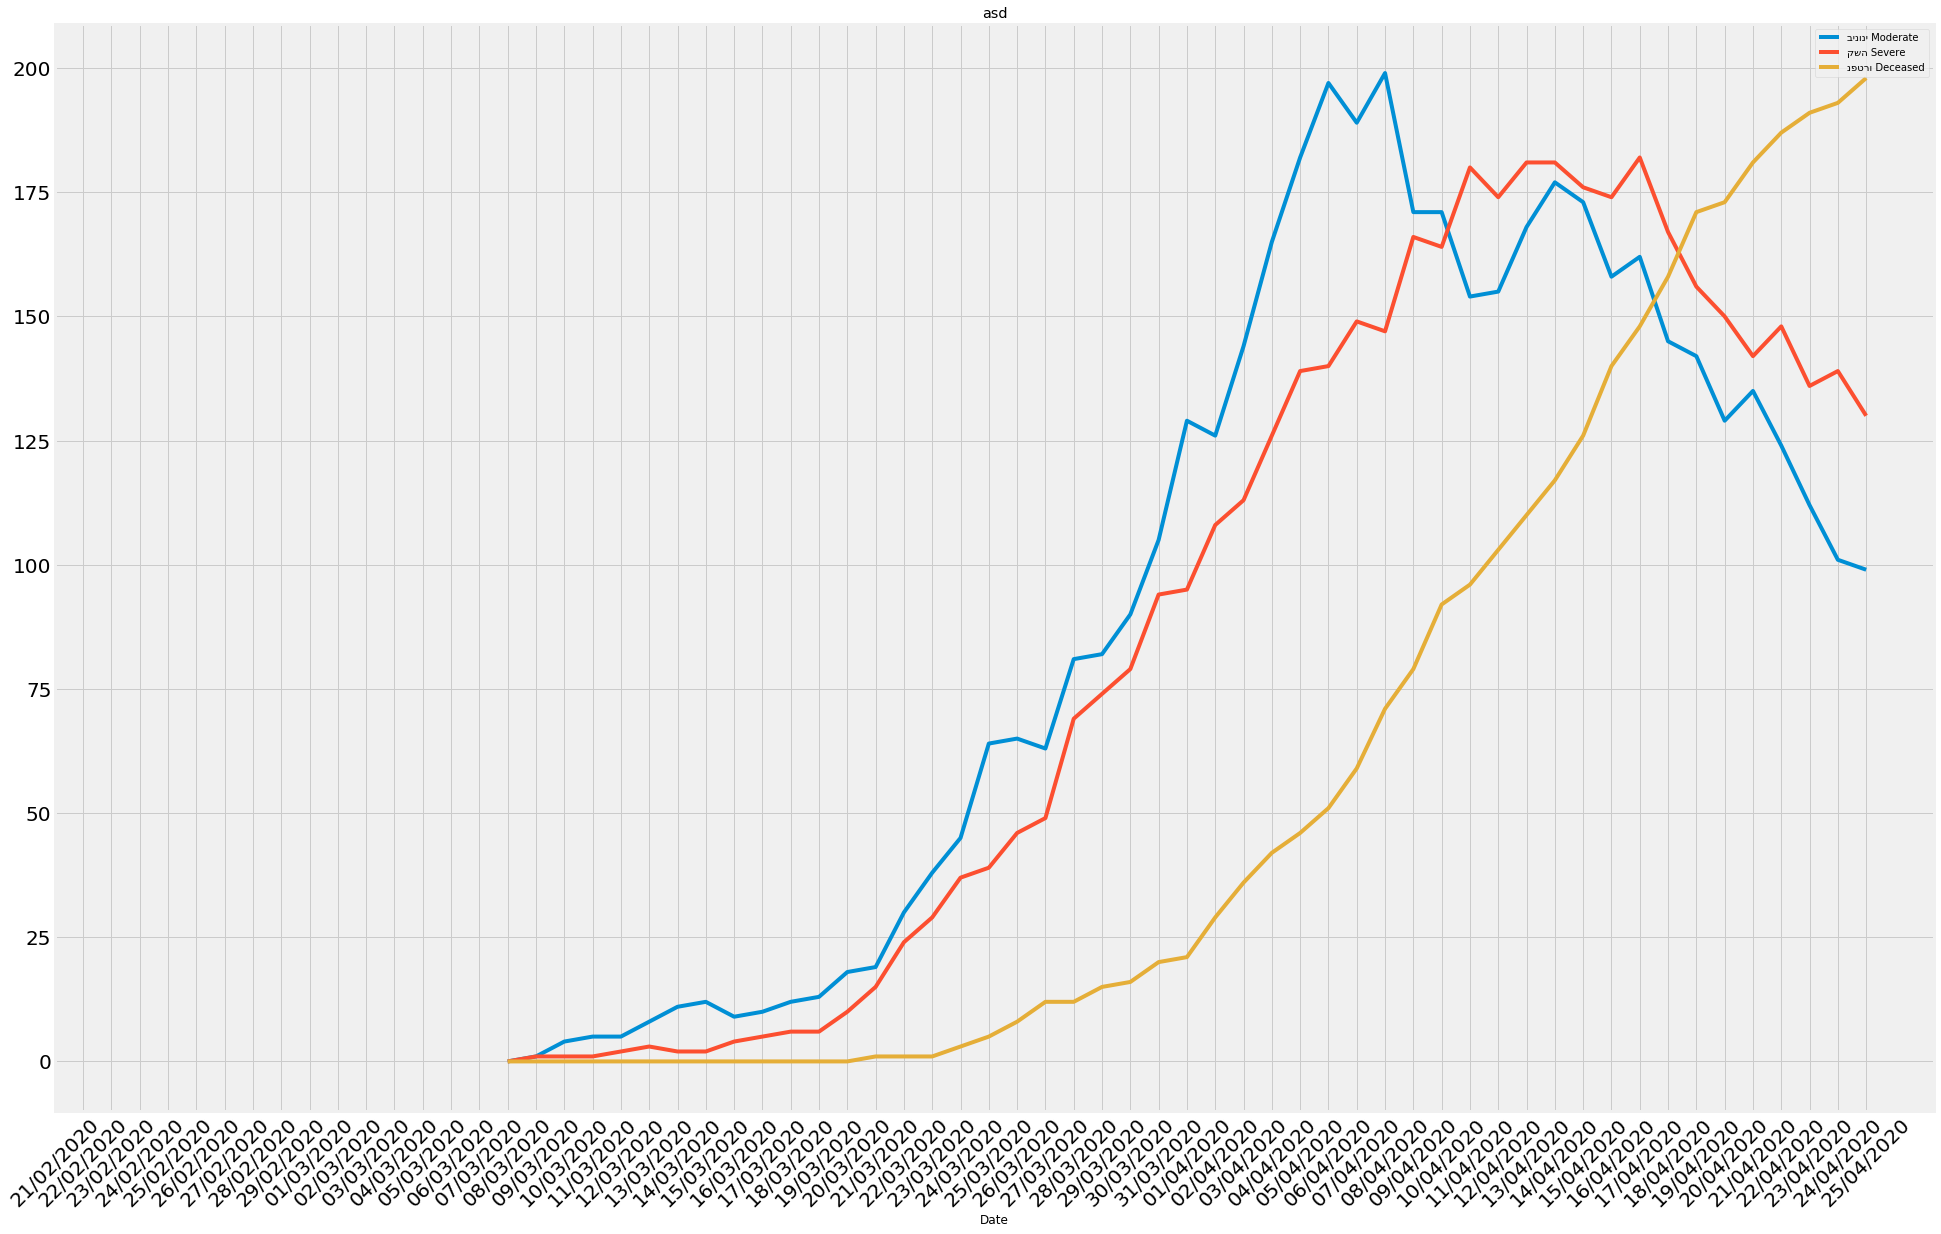

In [9]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## percentage of change in new  cases

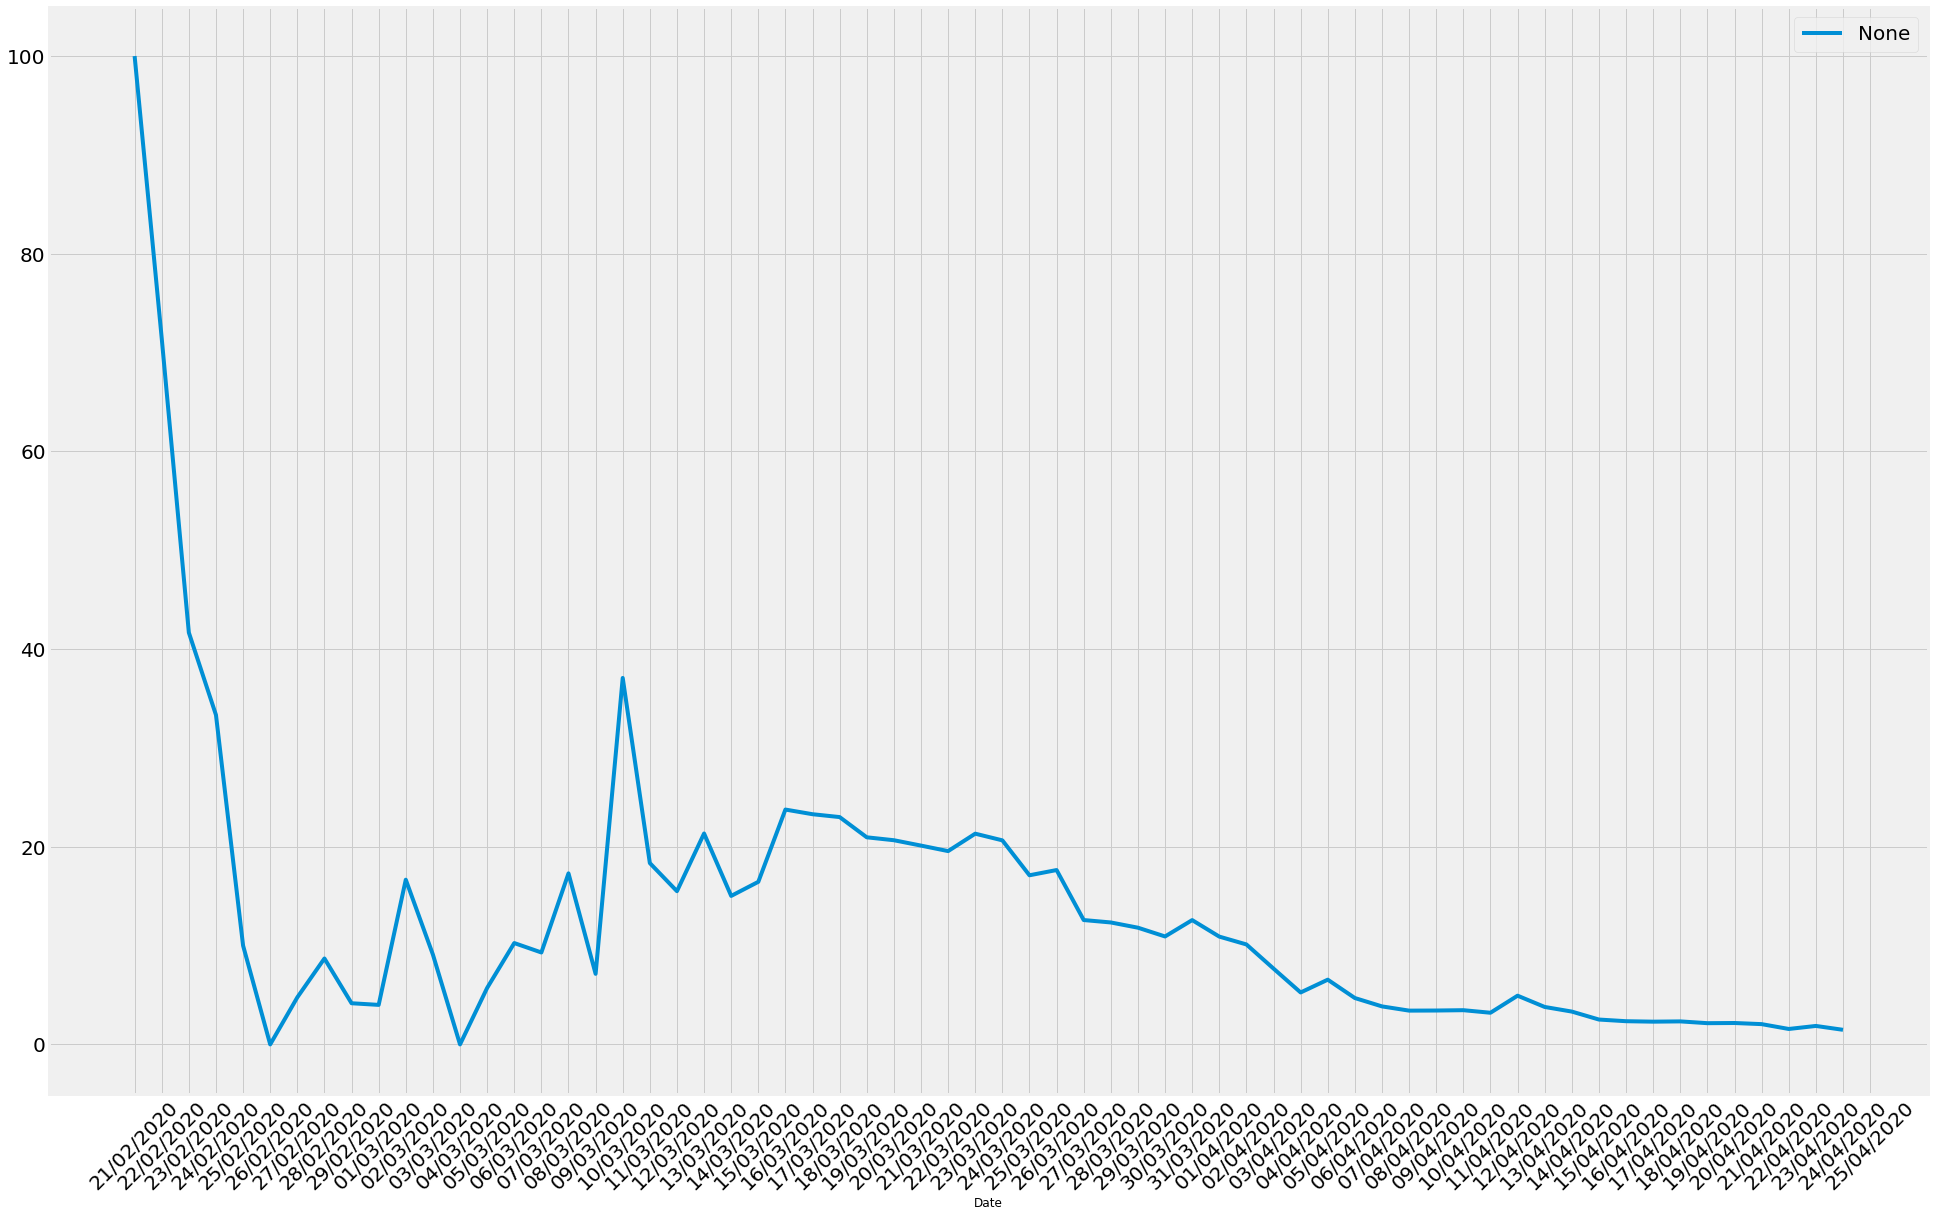

In [10]:
(df['New Cases'] / df['Total Cases'] * 100).plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)

## change in precentage from prev day  of moderate(blue), severe(red) and dead(yellow) and new cases(green)

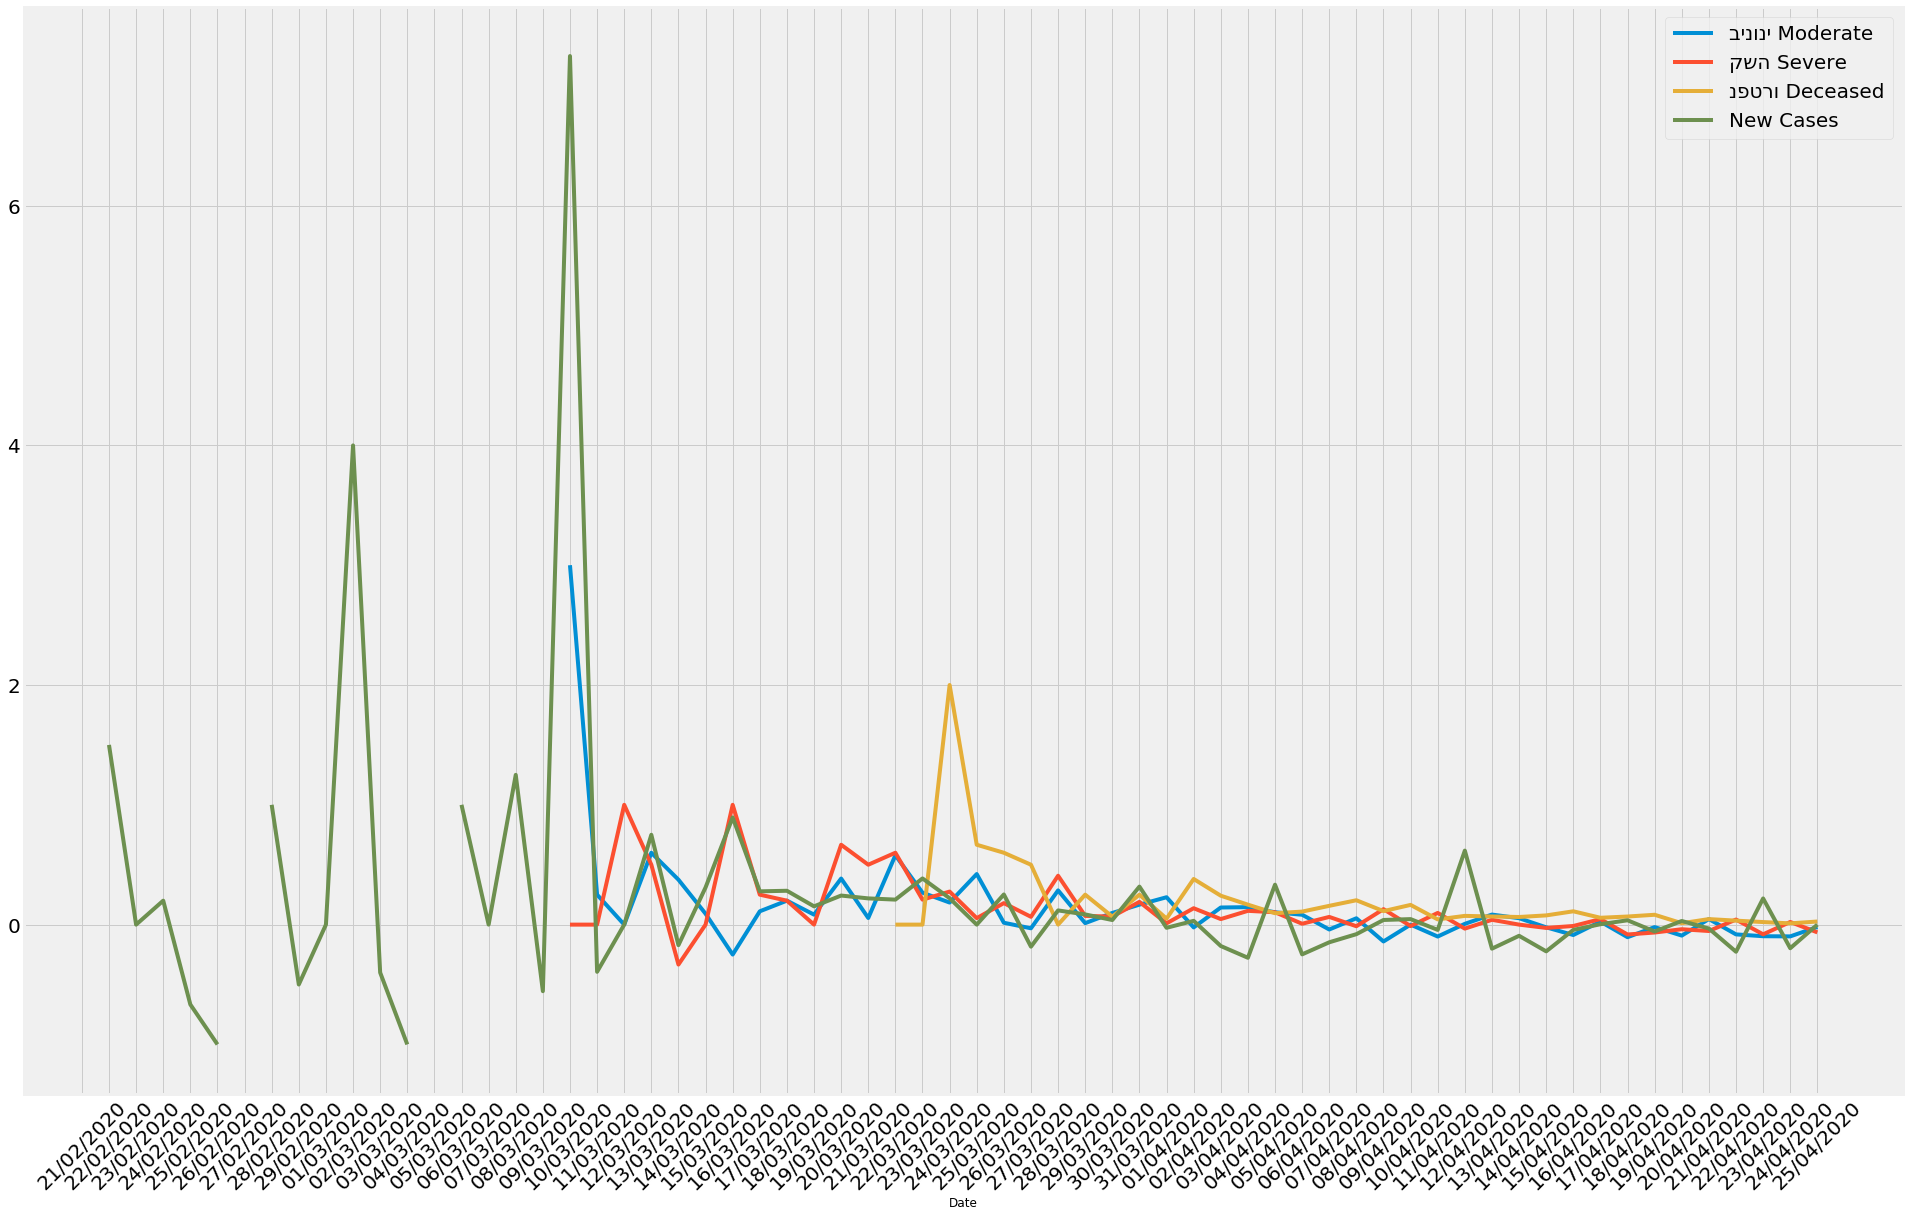

In [11]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased','New Cases']].pct_change().plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)